In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/rain fall predictiom.txt')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.shape

(142193, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
#it seemsa there are some  object columns.


In [9]:
df['RainToday'].replace({'Yes':1, 'No': 0},inplace = True)
df['RainTomorrow'].replace({'Yes':1, 'No': 0},inplace = True)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

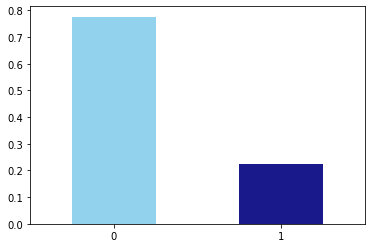

In [11]:
df.RainTomorrow.value_counts(normalize =True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.show()

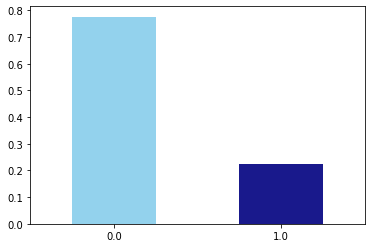

In [12]:
df.RainToday.value_counts(normalize =True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.show()

In [13]:
#it shows the data is imbalanced  for the preicted variable taht is RainTomarroe. 
# so we use,upsampling of the data.

In [14]:
from sklearn.utils import resample
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_upsample = resample(yes, replace = True,n_samples=len(no),random_state=101)
upsampled = pd.concat([no,yes_upsample])

In [16]:
no.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


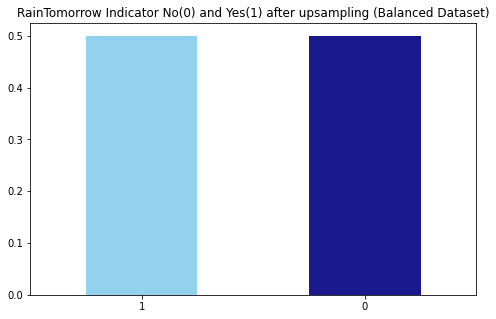

In [15]:
fig = plt.figure(figsize = (8,5))
upsampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after upsampling (Balanced Dataset)')
plt.show()

In [24]:
upsampled.isnull().sum().sort_values(ascending=False)

Sunshine         104537
Evaporation       94975
Cloud3pm          85680
Cloud9am          81329
Pressure9am       21745
Pressure3pm       21722
WindGustDir       15478
WindGustSpeed     15369
WindDir9am        14643
WindDir3pm         6373
Humidity3pm        5978
Temp3pm            4546
WindSpeed3pm       4294
Humidity9am        3075
RainToday          3071
Rainfall           3071
WindSpeed9am       2160
Temp9am            1627
MinTemp            1057
MaxTemp             444
Location              0
RainTomorrow          0
RISK_MM               0
Date                  0
dtype: int64

In [23]:
upsampled.isnull().count()

Date             220632
Location         220632
MinTemp          220632
MaxTemp          220632
Rainfall         220632
Evaporation      220632
Sunshine         220632
WindGustDir      220632
WindGustSpeed    220632
WindDir9am       220632
WindDir3pm       220632
WindSpeed9am     220632
WindSpeed3pm     220632
Humidity9am      220632
Humidity3pm      220632
Pressure9am      220632
Pressure3pm      220632
Cloud9am         220632
Cloud3pm         220632
Temp9am          220632
Temp3pm          220632
RainToday        220632
RISK_MM          220632
RainTomorrow     220632
dtype: int64

In [44]:
upsampled.shape

(220632, 24)

In [25]:
total = upsampled.isnull().sum().sort_values(ascending=False)
percent_missing = (upsampled.isnull().sum()/upsampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent_missing], axis=1, keys=['Total', 'Percent'])

In [26]:
missing

,Total,Percent
Sunshine,104537,0.473807
Evaporation,94975,0.430468
Cloud3pm,85680,0.388339
Cloud9am,81329,0.368618
Pressure9am,21745,0.098558
Pressure3pm,21722,0.098454
WindGustDir,15478,0.070153
WindGustSpeed,15369,0.069659
WindDir9am,14643,0.066368
WindDir3pm,6373,0.028885


In [27]:
# if we observe the above dataset top 4 has more than 10 percent values are missing.

In [30]:
upsampled['WindDir3pm'].mode()[0]

'W'

In [28]:
upsampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [32]:
#here we impute teh cat_Cols with mode.
cat_col = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in cat_col:
  upsampled[col] = upsampled[col].fillna(upsampled[col].mode()[0])

In [34]:
upsampled.WindDir3pm.isnull().sum()

0

In [35]:
# Now, we convert the categorical varibles into continous variables using label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in upsampled.select_dtypes(include = ['object']).columns:
  lencoders[col] = LabelEncoder()
  upsampled[col] = lencoders[col].fit_transform(upsampled[col])

In [37]:
upsampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,394,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,395,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,396,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,397,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,398,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [38]:
# sunshine, evaporation cloud3pm,cloud9pm has more values missing . we can drop those columns or we can use MICE

In [40]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputed= upsampled.copy(deep =True)
imputer = IterativeImputer()
imputed.iloc[:, :] = imputer.fit_transform(upsampled)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [41]:
Q1 = imputed.quantile(0.25)
Q3 = imputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1532.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.088630
Sunshine            5.924404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.700000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.690580
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [42]:
MiceImputed = imputed[~((imputed < (Q1 - 1.5 * IQR)) |(imputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156627, 24)

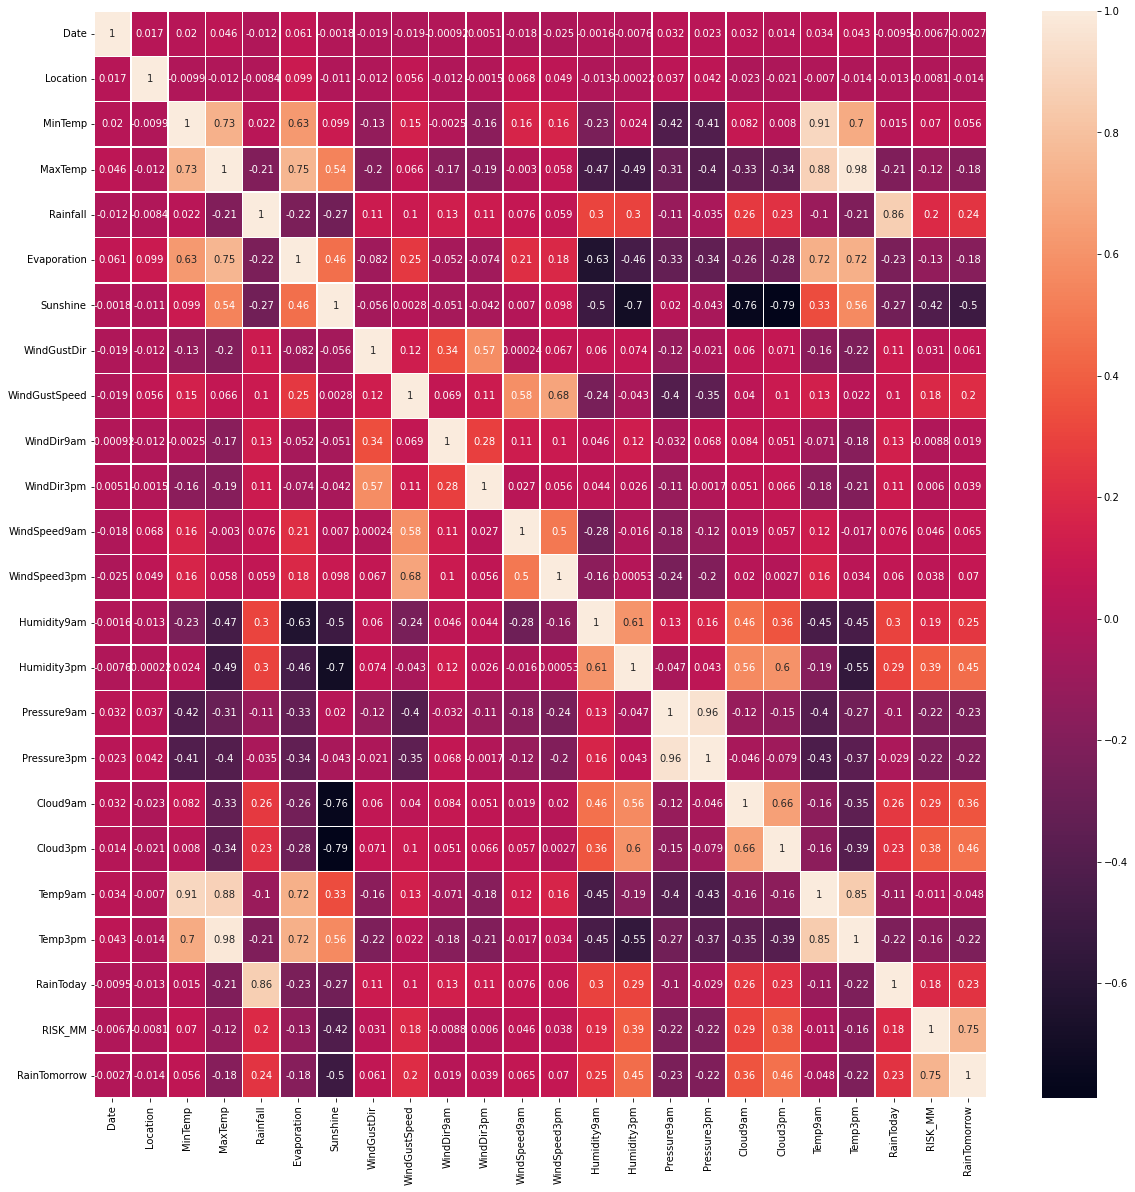

In [47]:
corr = MiceImputed.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, linewidths=.5)

#lets see which features have the strong co-relations.
 MaxTemp and MinTemp,
 
 Pressure9h and pressure3h,

 Evaporation and MaxTemp,

 MaxTemp and Temp3pm,

 Temp9am and Temp3pm

In [49]:
# we go ahead with all the feaqtures as thesre is no perfect corelation = 1.

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(MiceImputed)
modified_data = pd.DataFrame(sc.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [52]:
df1 = modified_data.copy()

In [53]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.114768,0.041667,0.543417,0.514778,0.433620,0.575456,0.502244,0.866667,0.521127,0.866667,0.933333,0.551003,0.615385,0.551353,0.220111,0.244957,0.298295,0.863563,0.420654,0.507086,0.530612,0.245811,0.000000,0.0
1,0.115060,0.041667,0.375350,0.568966,0.370688,0.569960,0.741294,0.933333,0.521127,0.400000,1.000000,0.172899,0.564103,0.247546,0.250106,0.328530,0.318182,0.337601,0.227489,0.515211,0.594388,0.245811,0.000000,0.0
2,0.115351,0.041667,0.529412,0.583744,0.370688,0.698950,0.788932,1.000000,0.549296,0.866667,1.000000,0.527371,0.666667,0.180034,0.300099,0.242075,0.343750,0.346304,0.173138,0.618127,0.566327,0.245811,0.000000,0.0
3,0.115642,0.041667,0.425770,0.640394,0.370688,0.590139,0.760357,0.266667,0.239437,0.600000,0.000000,0.338320,0.230769,0.258799,0.160119,0.530259,0.460227,0.295577,0.185240,0.539586,0.650510,0.245811,0.076923,0.0
4,0.115934,0.041667,0.658263,0.746305,0.475574,0.646386,0.407835,0.866667,0.478873,0.066667,0.466667,0.243794,0.512821,0.675127,0.330095,0.334294,0.267045,0.779708,0.692550,0.531461,0.732143,0.245811,0.015385,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129458,0.882610,0.312500,0.467787,0.374384,0.370688,0.355034,0.254506,0.466667,0.661972,0.400000,0.466667,0.787317,0.615385,0.438832,0.500071,0.319885,0.264205,0.779708,0.519413,0.360837,0.392857,0.245811,0.584615,1.0
1891,0.671133,0.041667,0.394958,0.453202,0.391666,0.285754,0.344755,0.933333,0.169014,0.266667,0.933333,0.220162,0.179487,0.877665,0.800028,0.536023,0.505682,0.444286,0.692550,0.379795,0.397959,0.245811,0.107692,1.0
57743,0.418002,0.125000,0.484594,0.701970,0.412643,0.606554,0.652408,0.200000,0.394366,0.133333,0.400000,0.291057,0.512821,0.427580,0.300099,0.383285,0.372159,0.276576,0.432844,0.574794,0.696429,0.245811,0.615385,1.0
102810,0.951063,0.583333,0.722689,0.628079,0.370688,0.986527,0.184546,1.000000,0.267606,0.466667,1.000000,0.220162,0.333333,0.427580,0.460077,0.288184,0.360795,0.779708,0.627679,0.645210,0.665816,0.245811,0.100000,1.0


In [54]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = df1.loc[:,df1.columns!='RainTomorrow']
y = df1[['RainTomorrow']]
selector = SelectKBest(chi2, k=11)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RISK_MM'],
      dtype='object')


we can get which features are more dominating the predictions.

In [56]:
X_new

array([[0.50224421, 0.52112676, 0.55135342, ..., 0.53061224, 0.24581096,
        0.        ],
       [0.74129406, 0.52112676, 0.24754644, ..., 0.59438776, 0.24581096,
        0.        ],
       [0.78893191, 0.54929577, 0.18003377, ..., 0.56632653, 0.24581096,
        0.        ],
       ...,
       [0.65240763, 0.3943662 , 0.42758021, ..., 0.69642857, 0.24581096,
        0.61538462],
       [0.18454586, 0.26760563, 0.42758021, ..., 0.66581633, 0.24581096,
        0.1       ],
       [0.09126594, 0.50704225, 0.56260554, ..., 0.3622449 , 0.24581096,
        0.61538462]])

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00218996 0.00244192 0.00280803 0.00336806 0.01005384 0.00287705
 0.06453446 0.00157933 0.00756582 0.00177377 0.00170098 0.00153017
 0.00214336 0.00736101 0.03198536 0.00894681 0.01387147 0.01949046
 0.0482969  0.00327656 0.00610899 0.00447447 0.75162124]


Now, we train the given dataset using multiple classification models.


In [58]:
X =MiceImputed.drop('RainTomorrow',axis=1)
y = MiceImputed['RainTomorrow']


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [62]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    
    
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc

In [61]:
# Logistic regression

Accuracy = 1.0
ROC Area under Curve = 1.0
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     23932
         1.0    1.00000   1.00000   1.00000     15225

    accuracy                        1.00000     39157
   macro avg    1.00000   1.00000   1.00000     39157
weighted avg    1.00000   1.00000   1.00000     39157



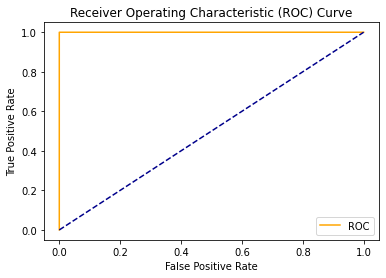

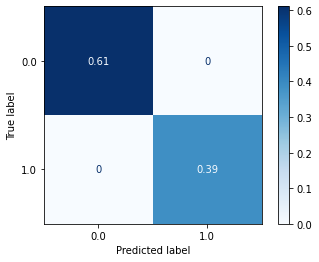

In [63]:
from sklearn.linear_model import LogisticRegression
params_lr = {
    'penalty': 'l1',
    'solver':'liblinear'
}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


Decision Tree


Accuracy = 0.9827106264524862
ROC Area under Curve = 0.9826297456916108
              precision    recall  f1-score   support

         0.0    0.98865   0.98299   0.98582     23932
         1.0    0.97351   0.98227   0.97787     15225

    accuracy                        0.98271     39157
   macro avg    0.98108   0.98263   0.98184     39157
weighted avg    0.98276   0.98271   0.98272     39157



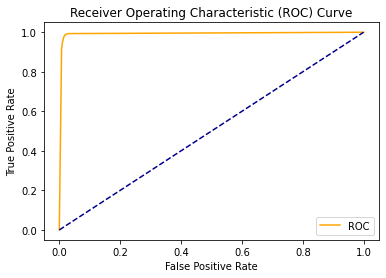

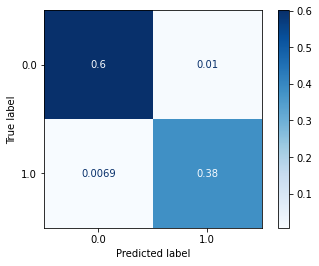

In [64]:
from sklearn.tree import DecisionTreeClassifier
params_dt ={
    'max_depth' : 16,
    'max_features' : "sqrt"
}
model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Random Forest

Accuracy = 1.0
ROC Area under Curve = 1.0
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     23932
         1.0    1.00000   1.00000   1.00000     15225

    accuracy                        1.00000     39157
   macro avg    1.00000   1.00000   1.00000     39157
weighted avg    1.00000   1.00000   1.00000     39157



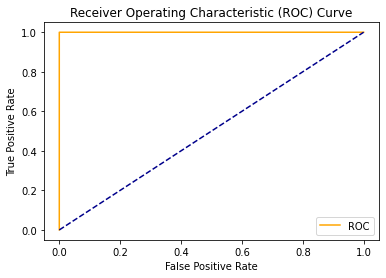

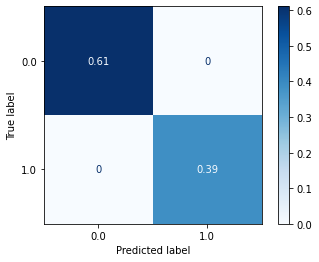

In [65]:
from sklearn.ensemble import RandomForestClassifier
params_rf = {
    'max_depth': 16,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 101
}
model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

XGBoost

Accuracy = 1.0
ROC Area under Curve = 1.0
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     23932
         1.0    1.00000   1.00000   1.00000     15225

    accuracy                        1.00000     39157
   macro avg    1.00000   1.00000   1.00000     39157
weighted avg    1.00000   1.00000   1.00000     39157



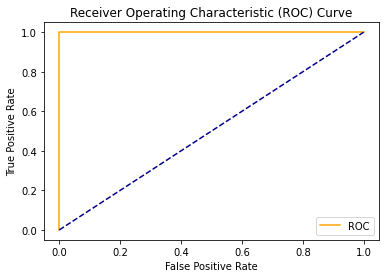

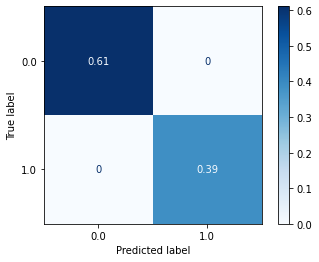

In [66]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb= run_model(model_xgb, X_train, y_train, X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword argu

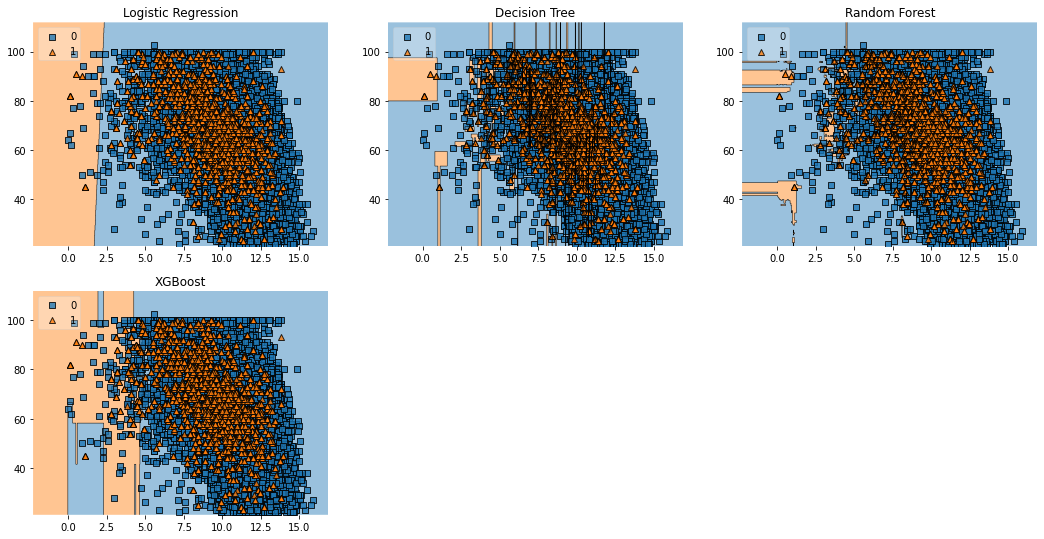

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345) 
clf3 = RandomForestClassifier(random_state=12345)
clf4 = xgb.XGBClassifier(random_state=12345)


X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Random Forest',
          'XGBoost']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4,],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()